<a href="https://colab.research.google.com/github/bruhmaad/HospitalManagementSystem/blob/main/Text_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
import pandas as pd
import numpy as np

import re
import string
import nltk
from nltk.corpus import stopwords

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

categories = [
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'alt.atheism',
 'soc.religion.christian',
]
dataset = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, remove=('headers', 'footers', 'quotes'))

In [ ]:
df = pd.DataFrame(dataset.data, columns=["corpus"])
print(df)

                                                 corpus
0     \nThey tried their best not to show it, believ...
1     \nStankiewicz?  I doubt it.\n\nKoufax was one ...
2     \n[deletia- and so on]\n\nI seem to have been ...
3     Excuse the sheer newbieness of this post, but ...
4     ==============================================...
...                                                 ...
3446  \n  Or, with no dictionary available, they cou...
3447  \n\nSorry to disappoint you but the Red Wings ...
3448  \n: Can anyone tell me where to find a MPEG vi...
3449                                                 \n
3450  \nHey Valentine, I don't see Boston with any w...

[3451 rows x 1 columns]


In [ ]:
df.describe()

,corpus
count,3451
unique,3362
top,
freq,66


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk
from nltk.corpus import stopwords
stopwords.words("english")[:10] 

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [ ]:
def preprocess_text(text: str, remove_stopwords: bool) -> str:
    text = re.sub(r"http\S+", "", text)
    text = re.sub("[^A-Za-z]+", " ", text)
    if remove_stopwords:
        tokens = nltk.word_tokenize(text)
        tokens = [w for w in tokens if not w.lower() in stopwords.words("english")]
        text = " ".join(tokens)
    text = text.lower().strip()
    return text

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['cleaned'] = df['corpus'].apply(lambda x: preprocess_text(x, remove_stopwords=True))
print(df)

                                                 corpus  \
0     \nThey tried their best not to show it, believ...   
1     \nStankiewicz?  I doubt it.\n\nKoufax was one ...   
2     \n[deletia- and so on]\n\nI seem to have been ...   
3     Excuse the sheer newbieness of this post, but ...   
4     ==============================================...   
...                                                 ...   
3446  \n  Or, with no dictionary available, they cou...   
3447  \n\nSorry to disappoint you but the Red Wings ...   
3448  \n: Can anyone tell me where to find a MPEG vi...   
3449                                                 \n   
3450  \nHey Valentine, I don't see Boston with any w...   

                                                cleaned  
0     tried best show believe surprised find sprint ...  
1     stankiewicz doubt koufax one two jewish hofs h...  
2     deletia seem rather unclear asking please show...  
3     excuse sheer newbieness post looking decent pa...  
4

In [ ]:
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
X = vectorizer.fit_transform(df['cleaned'])

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
clusters = kmeans.labels_

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
pca_vecs = pca.fit_transform(X.toarray())
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

In [ ]:
x0

array([-0.00152024, -0.03644996, -0.06548033, ...,  0.18883194,
        0.03557314, -0.05786917])

In [ ]:
x1

array([-0.00430002, -0.03914495,  0.08785332, ...,  0.05718469,
       -0.03828756, -0.10444227])

In [ ]:
df['cluster'] = clusters
df['x0'] = x0
df['x1'] = x1
print(df)

                                                 corpus  \
0     \nThey tried their best not to show it, believ...   
1     \nStankiewicz?  I doubt it.\n\nKoufax was one ...   
2     \n[deletia- and so on]\n\nI seem to have been ...   
3     Excuse the sheer newbieness of this post, but ...   
4     ==============================================...   
...                                                 ...   
3446  \n  Or, with no dictionary available, they cou...   
3447  \n\nSorry to disappoint you but the Red Wings ...   
3448  \n: Can anyone tell me where to find a MPEG vi...   
3449                                                 \n   
3450  \nHey Valentine, I don't see Boston with any w...   

                                                cleaned  cluster        x0  \
0     tried best show believe surprised find sprint ...        0 -0.001520   
1     stankiewicz doubt koufax one two jewish hofs h...        0 -0.036450   
2     deletia seem rather unclear asking please show...  

In [ ]:
def get_top_keywords(n_terms):
    df = pd.DataFrame(X.todense()).groupby(clusters).mean()
    terms = vectorizer.get_feature_names_out() 
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) 
            
get_top_keywords(10)


Cluster 0
good,last,games,like,would,year,think,one,team,game

Cluster 1
please,dos,use,know,program,anyone,files,file,thanks,windows

Cluster 2
christians,say,think,bible,believe,jesus,one,would,people,god


In [ ]:
cluster_map = {0: "sport", 1: "tech", 2: "religion"}
df['cluster'] = df['cluster'].map(cluster_map)

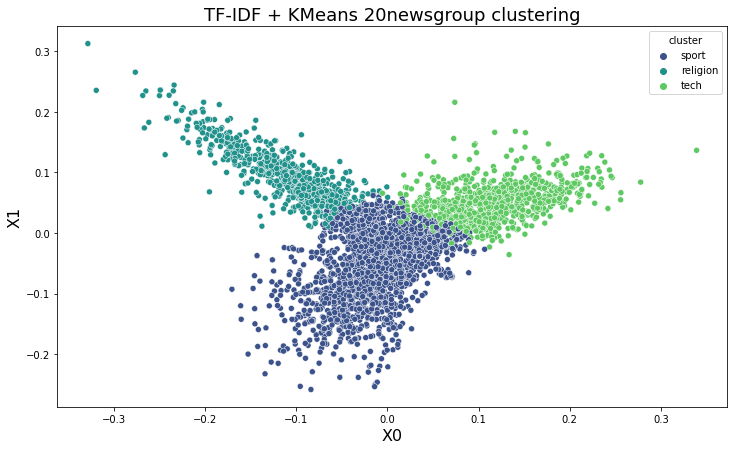

In [ ]:
plt.figure(figsize=(12, 7))
plt.title("TF-IDF + KMeans 20newsgroup clustering", fontdict={"fontsize": 18})
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
sns.scatterplot(data=df, x='x0', y='x1', hue='cluster', palette="viridis")
plt.show()